In [1]:
!pip install statsmodels
!pip install wooldridge

In [21]:
import wooldridge as wo
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#importamos datos de datawoo. el objetivo a calcular es wage
df=wo.dataWoo("wage1")


In [ ]:
#regresion simple es cuando sólo hayuna variable dependiente. Es el modelo mas sencillo de interpretar.
#la relacion entre variables es una relacion lineal. y = b0 + b1*x (una recta)
#empezamos mirando la relacion entre el salario y la educacion

#el priemr paso es calcular b0 y b1. b es igual a (x'x elevado a la -1)*x'y 
# x son nuestros datos e "y" el resultado a calcular(salario en este caso)

In [5]:
#vamos a decir que x es la educacion, ya que creemos que es una variable importante.
#lo pasamos a un vector poniendo el to_numpy

x=df["educ"].to_numpy()

In [6]:
x

array([11, 12, 11,  8, 12, 16, 18, 12, 12, 17, 16, 13, 12, 12, 12, 16, 12,
       13, 12, 12, 12, 12, 16, 12, 11, 16, 16, 16, 15,  8, 14, 14, 13, 12,
       12, 16, 12,  4, 14, 12, 12, 12, 14, 11, 13, 15, 10, 12, 14, 12, 12,
       16, 12, 12, 12, 15, 16,  8, 18, 16, 13, 14, 10, 10, 14, 14, 16, 12,
       16, 12, 16, 17, 12, 12, 12, 13, 12, 12, 12, 18,  9, 16, 10, 12, 12,
       12, 12, 12,  8, 12, 12, 14, 12, 12, 12,  9, 13, 12, 14, 12, 15, 12,
       12, 12, 14, 15, 12, 12, 12, 17, 11, 18, 12, 14, 14, 10, 14, 12, 15,
        8, 16, 14, 15, 12, 18, 16, 10,  8, 10, 11, 18, 15, 12, 11, 12, 12,
       14, 16,  2, 14, 16, 12, 12, 13, 12, 15, 10, 12, 16, 13,  9, 12, 13,
       12, 12, 14, 16, 16,  9, 18, 10, 10, 13, 12, 18, 13, 12, 13, 13, 13,
       18, 12, 12, 13, 12, 12, 12, 14, 10, 12, 16, 16, 12, 14, 12, 12, 12,
       12, 12, 12, 12, 16, 16, 14, 11, 16, 12, 12, 17, 12, 12, 16,  8, 12,
       12, 12, 16, 12, 12,  9, 13, 16, 14,  8, 14, 13, 12, 18,  9,  8,  8,
       12, 14, 12, 16,  8

In [8]:
#hacemos un vector de solo 1, y la concatenamos a cada valor de  1 
#ponemos el vector de 1 a cada valor. este vector es b0
X=np.c_[np.ones(len(x)),x]

In [14]:
#lwage es el logaritmo del salario. se hace con el logaritmo para acercarnos al supusto de que los errores sean normales
y=df["lwage"].to_numpy()
y=y.reshape(-1,1)

In [19]:
#hacemos la inversa de la multiplicacion de X traspuesta por X. se pone @ para que se haga multiplicacion de matrices
#despues lo multiplicamos por la multiplicacion de X por la traspuesta de Y.
# el resultado es el punto de origen (intercepto) y la pendiente
#y = b0 + b1*x (una recta) ----> #y = 0.58377267 + 0.08274437*x 


recta=np.linalg.inv(X.T@X)@(X.T@y)
recta

array([[0.58377267],
       [0.08274437]])

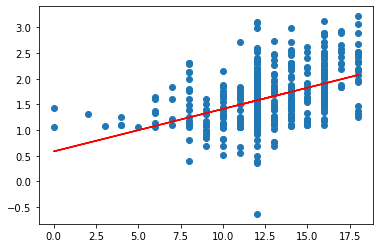

In [25]:
plt.scatter(x,y)
plt.plot(x,recta[0]+recta[1]*x,color="red")

In [26]:
#hacemos lo mismo pero con la Api de statmodels
#lwage es la variable dependiente y educ es la variable independiente, esto lo decimos poniendole la ~
reg=smf.ols(formula="lwage~educ",data=df)

In [28]:
resultado=reg.fit()

In [29]:
resultado.params

Intercept    0.583773
educ         0.082744
dtype: float64

In [30]:
resultado.summary()

#R-squared es el porcentaje de varianza explicado por nuestra variable independiente (educacion). 
# la educacion indica un 18.6% del cambio en el salario
#si el Prob (F-statistic)es muy pequeño significa que el modelo funciona bien, es significativo. que tiene causalidad y tiene r
# relacion real entre ls variables.
# si es un valor por encima de 0.05 el modelo no es significativo.

#ej: el precio del arroz en china y el numero de semaforos en la calle en argentina pueden tener una relacion, 
#pero no tienen ninguna causalidad.

#-----
#el intervalo de Intercept es 0.393	0.775. si este valor pasa por 0,el modelo no es significativo 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           3.27e-25
Time:                        16:01:39   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#para saber la variacion del salario, multiplicamos por 100 el coeficiente de la variable independiente (educacion)
#por cada añlo de educacion añadido seria y = 0.58377267 + 8.274437*x, siendo x el numero de años añadidos

y = 0.58377267 + 0.08274437*x 

In [ ]:
#Regresion lineal multiple : con más de una variable independiente

In [33]:
reg=smf.ols(formula="lwage~educ+exper",data=df)

In [35]:
resultado=reg.fit()
resultado.summary()

#educacion y experiencia indican en un 25% la variacion del salario
#siempre que añadamos varibales el R-squared va a subir asi que tomamos el Adj. R-squared

#el Prob (F-statistic) es èqueño, el modelo es significativo. alguna de las variables es estadistocamente significativa

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     86.86
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.68e-33
Time:                        16:22:07   Log-Likelihood:                -338.01
No. Observations:                 526   AIC:                             682.0
Df Residuals:                     523   BIC:                             694.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2169      0.109      1.997      0.046       0.004       0.430
educ           0.0979      0.008     12.848      0.000       0.083       0.113
exper          0.0103      0.002      6.653      0.000       0.007       0.013
==============================================================================
Omnibus:                        7.740   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.485
Skew:                           0.165   Prob(JB):                      0.00872
Kurtosis:                       3.569   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#como antes hemos hecho el logaritmo del salario, hacemos el exponencial. si no tuvieramos nada de educacion
#ni experiencia, el salario seria igual a 1.24 por hora.
#si incremento mi educacion en un año, mi salario va a ser un 9.79% mayor (coef -educ)
#si incremento mi experiencia en un año, mi salario va a ser un 1.03% mayor (coef -exper)

#el intercepto del modelo tiene un P valor de 0.046. a partir de 0.05 deja de ser significativo, 
#por lo que esta en el limite.
#ninguno de los P interceptos pasa por 0 , asi que todos son significativos.

np.exp (0.2169)

1.2422198739390637

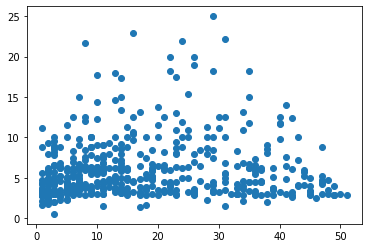

In [37]:
plt.scatter(df["exper"],df["wage"])


In [39]:
reg=smf.ols(formula="lwage~educ+exper+expersq",data=df)

#añadimos el cuadrado de la experiencia, porque a partir de ciuerta edad la experiencia no cuneta tanto e incluso
#puede llegar a ser un handicap (p.ej personas mayores de 60 años)

In [40]:
resultado=reg.fit()
resultado.summary()

#el Adj. R-squared dice quelas variables explicanun 30% del cambio
#Prob (F-statistic):	3.38e-40 es muy pequeño, nos dice que el modelo es significativo
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     74.67
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           3.38e-40
Time:                        16:35:35   Log-Likelihood:                -319.53
No. Observations:                 526   AIC:                             647.1
Df Residuals:                     522   BIC:                             664.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1280      0.106      1.208      0.227      -0.080       0.336
educ           0.0904      0.007     12.100      0.000       0.076       0.105
exper          0.0410      0.005      7.892      0.000       0.031       0.051
expersq       -0.0007      0.000     -6.164      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                7.152
Skew:                           0.028   Prob(JB):                       0.0280
Kurtosis:                       3.568   Cond. No.                     4.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
0.0410/(-2*-0.0007)

#a los 29 años de experiencia es cuando alcanzas tu máximo salario posible,
#teniendo en cuenta solamente la experiencia y la educacion 

29.28571428571429

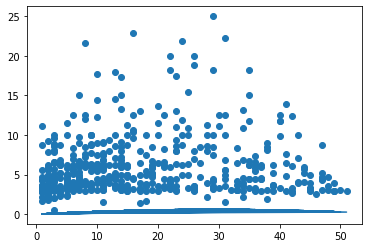

In [43]:
plt.scatter(df["exper"],df["wage"])
plt.plot(df["exper"],df["exper"]*0.0410+df["expersq"]*-0.0007)

In [44]:
wo.data("wage1",description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [45]:
#hago un nuevo modelo que incluya tenure, los años con el mismo empleador

reg=smf.ols(formula="lwage~educ+exper+expersq+tenure",data=df)

In [46]:
resultado=reg.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     73.09
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           3.81e-49
Time:                        16:51:50   Log-Likelihood:                -296.29
No. Observations:                 526   AIC:                             602.6
Df Residuals:                     521   BIC:                             623.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1983      0.102      1.945      0.052      -0.002       0.399
educ           0.0853      0.007     11.873      0.000       0.071       0.099
exper          0.0329      0.005      6.425      0.000       0.023       0.043
expersq       -0.0007      0.000     -5.945      0.000      -0.001      -0.000
tenure         0.0208      0.003      6.938      0.000       0.015       0.027
==============================================================================
Omnibus:                       14.093   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.057
Skew:                          -0.114   Prob(JB):                     2.20e-06
Kurtosis:                       4.066   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#coeficiente de correlaciones entre variables
df.corr()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
wage,1.000000,0.405903,0.112903,0.346890,-0.038520,-0.340098,0.228817,-0.053760,0.177885,-0.029124,-0.102503,0.087732,0.004034,0.073725,0.055940,-0.189848,-0.141624,0.085204,0.441770,-0.140837,-0.253078,0.937062,0.030238,0.267419
educ,0.405903,1.000000,-0.299542,-0.056173,-0.084654,-0.085029,0.068881,-0.215291,0.224309,0.061372,-0.116625,0.016343,-0.077411,-0.012461,0.107736,-0.059204,-0.072659,0.214198,0.496768,-0.008324,-0.163345,0.431053,-0.331256,-0.069106
exper,0.112903,-0.299542,1.000000,0.499291,0.014356,-0.041626,0.316984,-0.056319,-0.117260,0.010588,0.050323,-0.017398,-0.072841,0.101432,-0.048267,-0.104626,0.041499,-0.020599,-0.005615,-0.040385,-0.071080,0.111373,0.960971,0.422942
tenure,0.346890,-0.056173,0.499291,1.000000,0.011589,-0.197910,0.239889,-0.027037,0.000745,0.014093,-0.025067,-0.021291,-0.025888,0.160519,0.063885,-0.126224,-0.062604,-0.059691,0.090624,-0.072831,-0.112679,0.325538,0.459223,0.921564
nonwhite,-0.038520,-0.084654,0.014356,0.011589,1.000000,-0.010917,-0.062259,0.077701,-0.014147,-0.080201,0.102098,-0.002287,0.046109,0.036261,-0.072328,-0.048486,0.094866,-0.056680,-0.088552,-0.034138,-0.028769,-0.038888,0.009348,-0.007203
female,-0.340098,-0.085029,-0.041626,-0.197910,-0.010917,1.000000,-0.166128,0.033148,0.016545,0.015453,-0.044438,0.054417,-0.082032,-0.092721,-0.018964,-0.053351,0.108833,0.215939,-0.177376,0.355233,0.159226,-0.373677,-0.027860,-0.175623
married,0.228817,0.068881,0.316984,0.239889,-0.062259,-0.166128,1.000000,0.154497,-0.097230,-0.011716,0.075150,-0.022277,0.007452,0.079615,0.038239,-0.136572,-0.054906,0.064603,0.085544,0.025711,-0.157040,0.270669,0.217289,0.166822
numdep,-0.053760,-0.215291,-0.056319,-0.027037,0.077701,0.033148,0.154497,1.000000,-0.096368,-0.089640,0.087655,0.008480,0.014096,0.016017,-0.014791,0.047992,-0.061708,-0.072145,-0.123401,0.028897,0.055361,-0.095297,-0.130906,-0.056640
smsa,0.177885,0.224309,-0.117260,0.000745,-0.014147,0.016545,-0.097230,-0.096368,1.000000,0.055216,-0.231449,0.098553,-0.006885,-0.098107,0.007973,0.017948,0.010028,0.046049,0.145965,0.107216,-0.030039,0.200124,-0.110918,0.004473
northcen,-0.029124,0.061372,0.010588,0.014093,-0.080201,0.015453,-0.011716,-0.089640,0.055216,1.000000,-0.429892,-0.261212,-0.021493,-0.000787,-0.059439,0.020417,-0.062645,0.068810,0.068841,-0.024479,0.043253,-0.015858,0.033540,0.009093


In [50]:
reg=smf.ols(formula="lwage~educ+exper+expersq+tenure+female",data=df)

In [51]:
resultado=reg.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     79.77
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           4.78e-62
Time:                        17:04:52   Log-Likelihood:                -263.72
No. Observations:                 526   AIC:                             539.4
Df Residuals:                     520   BIC:                             565.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4146      0.099      4.171      0.000       0.219       0.610
educ           0.0810      0.007     11.934      0.000       0.068       0.094
exper          0.0328      0.005      6.820      0.000       0.023       0.042
expersq       -0.0006      0.000     -6.197      0.000      -0.001      -0.000
tenure         0.0162      0.003      5.629      0.000       0.011       0.022
female        -0.2979      0.036     -8.280      0.000      -0.369      -0.227
==============================================================================
Omnibus:                       14.455   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.752
Skew:                          -0.097   Prob(JB):                     9.41e-07
Kurtosis:                       4.108   Cond. No.                     4.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#creamos una interaccion. multiplicamos el valor de female por el de married.

reg=smf.ols(formula="lwage~educ+exper+expersq+tenure+female*married",data=df)


In [53]:
resultado=reg.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     61.86
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.13e-64
Time:                        17:09:26   Log-Likelihood:                -253.65
No. Observations:                 526   AIC:                             523.3
Df Residuals:                     518   BIC:                             557.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3173      0.100      3.160      0.002       0.120       0.515
educ               0.0795      0.007     11.841      0.000       0.066       0.093
exper              0.0297      0.005      5.815      0.000       0.020       0.040
expersq           -0.0006      0.000     -5.475      0.000      -0.001      -0.000
tenure             0.0149      0.003      5.247      0.000       0.009       0.021
female            -0.1070      0.056     -1.912      0.056      -0.217       0.003
married            0.2197      0.056      3.958      0.000       0.111       0.329
female:married    -0.3076      0.072     -4.273      0.000      -0.449      -0.166
==============================================================================
Omnibus:                       16.140   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.927
Skew:                          -0.072   Prob(JB):                     4.29e-08
Kurtosis:                       4.236   Cond. No.                     5.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#vamos a trabajar con 4 supuestos
# 1: No multicolinealidad
# 2: Homocedasticidad. si este supuesto no se cumple (p valor menor de 0.05) los estimadores son ineficientes.
# no podemos hacer predicciones, solo interpretar
# 3: Autocorrelación
# 4: Distribución normal de los errores

In [ ]:

#supuesto número 1: multicolinealidad. si tengo varias variables, no puede depender linealmente una variable de otra
#ej: x1 no puede ser 3 veces x2, o 3+5x3 por ejemplo.
#hemos detectar si tenemos multicolinealidd en las variables numericas.

In [ ]:
#supuesto 2 Homocedasticidad. la varianza de los errores da unas variables constantes.

In [56]:
hprice1=wo.dataWoo("hprice1")

In [60]:
reg=smf.ols(formula="price~lotsize+sqrft+bdrms",data=hprice1)

In [70]:
resultado=reg.fit(cov_type="HC0")  
resultado.summary()

#dentro del fit ponemos el tipo de covarianza HC0 para corregir la no homocedasticidad

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     24.85
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.33e-11
Time:                        17:35:52   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     36.284     -0.600      0.549     -92.886      49.346
lotsize        0.0021      0.001      1.691      0.091      -0.000       0.004
sqrft          0.1228      0.017      7.090      0.000       0.089       0.157
bdrms         13.8525      8.284      1.672      0.094      -2.383      30.088
==============================================================================
Omnibus:                       20.398   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.278
Skew:                           0.961   Prob(JB):                     9.79e-08
Kurtosis:                       5.261   Cond. No.                     6.41e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 6.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#Test de Breusch-Pagan pra hacer el test de homocedasticidad
import statsmodels.api as sm

In [65]:
!pip install patsy
import patsy as pt

In [67]:
y,X=pt.dmatrices("price~lotsize+sqrft+bdrms",data=hprice1,return_type="dataframe")
bp_lm=sm.stats.diagnostic.het_breuschpagan(resultado.resid,X)

In [69]:
bp_lm[1] 
#el valor 0 es la estadistico y el 1 es el p valor
#si tenemos un p valor (menor de 0.05) diremos que nuestro modelo es heterocedastico

0.0027820595556890867

In [79]:
#una manera de corregirlo es cambiando la forma funcional, ponemos las variables de forma logaritmica. precio, tamaño,etc...
# son variables continuas, las usamos. bedrroms no lo cambiamos porque es una variable discreta,de numeros enteros.

reg=smf.ols(formula="np.log(price)~np.log(lotsize)+np.log(sqrft)+bdrms",data=hprice1)
resultado=reg.fit()
#test
y,X=pt.dmatrices("np.log(price)~np.log(lotsize)+np.log(sqrft)+bdrms",data=hprice1,return_type="dataframe")
bp_lm=sm.stats.diagnostic.het_breuschpagan(resultado.resid,X)
print(bp_lm[1])

#nuestro modelo esta por encima de 0.05, ya no es heterocedastico es homocedastico.
#

0.2383448263149274


In [83]:
hprice1

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630
...,...,...,...,...,...,...,...,...,...,...
83,295.0,318.299988,3,6056.0,1837,1,5.686975,5.762994,8.708805,7.515889
84,236.0,259.399994,3,5828.0,1715,0,5.463832,5.558371,8.670429,7.447168
85,202.5,258.100006,3,6341.0,1574,0,5.310740,5.553347,8.754792,7.361375
86,219.0,232.000000,2,6362.0,1185,0,5.389072,5.446737,8.758098,7.077498


In [85]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           9.74e-19
Time:                        17:58:19   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2970      0.651     -1.992      0.050      -2.592      -0.002
np.log(lotsize)     0.1680      0.038      4.388      0.000       0.092       0.244
np.log(sqrft)       0.7002      0.093      7.540      0.000       0.516       0.885
bdrms               0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""